In [60]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

In [61]:
img = 300 .* convert(Array{Float32}, channelview(load("obj.tif")))
psf = ifftshift(convert(Array{Float32}, channelview(load("psf.tif"))))
psf ./= sum(psf)
# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2, 3])
img_n = poisson(img_b, 300);

In [62]:
# the regularizer must be now adapted since we want to have
# a 3D one
reg1 = TV(num_dims=3, sum_dims=[1, 2, 3])
reg2 = Tikhonov(num_dims=3, sum_dims=[1, 2, 3], mode="identity")

#19 (generic function with 1 method)

In [63]:
@time res, ores = deconvolution(img, psf, regularizer=reg1, loss=Poisson(),
                          λ=0.05, padding=0.2, iterations=10);
@time res2, ores = deconvolution(img, psf, regularizer=reg2, loss=Poisson(),
                          λ=0.001, padding=0.0, iterations=10);

  3.774997 seconds (2.16 M allocations: 3.244 GiB, 2.88% gc time)
  1.310807 seconds (23.61 M allocations: 1.494 GiB, 22.34% gc time)


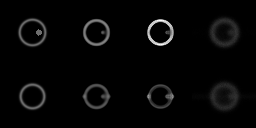

In [66]:
img_comb1 = [img[:, : ,32] res2[:, :, 32] res[:, :, 32] img_n[:, :, 32]]
img_comb2 = [img[:, : ,38] res2[:, :, 38] res[:, :, 38] img_n[:, :, 38]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)


imshow([img[:, :, 20:end] res2[:, :, 20:end] res[:, :, 20:end] img_n[:, :, 20:end]])
colorview(Gray, img_comb)